<a href="https://colab.research.google.com/github/mariabandeira/AdministracaoPublica/blob/main/CadUnico/RandomForest/TrainningPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score

### Pré-processamento dos dados

In [2]:
FILE_PATH_2016 = 'https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesPB/cadunico_pb_2016.csv'
cadUnicoPB2016 = pd.read_csv(FILE_PATH_2016, sep=';', low_memory=False)

In [3]:
FILE_PATH_2017 = 'https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesPB/cadunico_pb_2017.csv'
cadUnicoPB2017 = pd.read_csv(FILE_PATH_2017, sep=';', low_memory=False)

In [4]:
FILE_PATH_2018 = 'https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesPB/cadunico_pb_2018.csv'
cadUnicoPB2018 = pd.read_csv(FILE_PATH_2018, sep=';', low_memory=False)

In [5]:
# Juntando os três datasets
data = pd.concat([cadUnicoPB2016, cadUnicoPB2017, cadUnicoPB2018], ignore_index=True)

In [6]:
data.head()

,index,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,marc_pbf
0,53308,2504009,2,2,58309.0,2012-02-03,2014-02-19,190,2014-02-19,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,4,"5,33757943220439",0
1,53309,2508604,1,2,58310.0,2007-08-10,2016-09-20,71,2016-09-20,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,7,"5,33794943220439",1
2,53310,2504009,2,2,58311.0,2010-06-28,2016-12-06,70,2015-03-11,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,"5,33757943220439",1
3,53311,2507200,1,2,58312.0,2015-03-10,2015-03-10,3,2015-03-10,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,205.0,2,"5,33794943220439",1
4,53312,2504009,2,2,58313.0,2014-07-01,2014-07-01,600,2014-07-01,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,"5,33757943220439",0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435656 entries, 0 to 435655
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          435656 non-null  int64  
 1   cd_ibge                        435656 non-null  int64  
 2   estrato                        435656 non-null  int64  
 3   classf                         435656 non-null  int64  
 4   id_familia                     435656 non-null  float64
 5   dat_cadastramento_fam          435656 non-null  object 
 6   dat_alteracao_fam              435656 non-null  object 
 7   vlr_renda_media_fam            435654 non-null  object 
 8   dat_atualizacao_familia        435656 non-null  object 
 9   cod_local_domic_fam            435519 non-null  float64
 10  cod_especie_domic_fam          435519 non-null  float64
 11  qtd_comodos_domic_fam          418178 non-null  float64
 12  qtd_comodos_dormitorio_fam    

In [8]:
data.describe()

,index,cd_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,...,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,cod_eas_fam,cod_centro_assist_fam,ind_parc_mds_fam,qtde_pessoas,marc_pbf
count,4.356560e+05,4.356560e+05,435656.000000,435656.000000,4.356560e+05,435519.000000,435519.000000,418178.000000,418287.000000,418364.000000,...,418364.000000,418364.000000,418364.000000,435656.000000,433851.000000,2.312770e+05,8.230600e+04,367821.000000,435656.000000,435656.000000
mean,2.069215e+06,2.508092e+06,1.670084,2.474487,2.172231e+06,1.243333,1.041199,4.677683,1.794949,2.752923,...,1.502483,1.167684,1.962282,1.995857,1.995980,2.918613e+06,2.492482e+10,20.660248,2.785565,0.647206
std,1.475912e+06,4.660160e+03,0.470183,0.709445,1.526303e+06,0.429095,0.207666,1.309749,0.685493,1.372751,...,0.925876,0.712860,0.982736,0.064234,0.063275,9.737563e+05,1.430333e+09,64.138938,1.432760,0.477840
min,8.000000e+00,2.500106e+06,1.000000,1.000000,9.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.313499e+06,1.250430e+10,0.000000,1.000000,0.000000
25%,6.627548e+05,2.504009e+06,1.000000,2.000000,7.085218e+05,1.000000,1.000000,4.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.357100e+06,2.504400e+10,0.000000,2.000000,0.000000
50%,1.800288e+06,2.507507e+06,2.000000,3.000000,1.912768e+06,1.000000,1.000000,5.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.606690e+06,2.508700e+10,0.000000,3.000000,1.000000
75%,3.541064e+06,2.512101e+06,2.000000,3.000000,3.544558e+06,1.000000,1.000000,5.000000,2.000000,5.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,3.015823e+06,2.513352e+10,0.000000,4.000000,1.000000
max,5.130622e+06,2.517407e+06,2.000000,3.000000,5.135650e+06,2.000000,3.000000,19.000000,20.000000,7.000000,...,6.000000,6.000000,3.000000,2.000000,2.000000,9.419624e+06,2.517400e+10,306.000000,31.000000,1.000000


In [9]:
# removendo colunas que não se encontram em um formato adequado para um treinamento de ML
data = data.drop(columns=['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia', 'nom_estab_assist_saude_fam', 'cod_eas_fam', 'nom_centro_assist_fam', 'cod_centro_assist_fam', 'index'])

data.head()

,cd_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,...,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,marc_pbf
0,2504009,2,2,58309.0,190,1.0,1.0,4.0,1.0,5.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,4,"5,33757943220439",0
1,2508604,1,2,58310.0,71,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,7,"5,33794943220439",1
2,2504009,2,2,58311.0,70,1.0,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1,"5,33757943220439",1
3,2507200,1,2,58312.0,3,2.0,1.0,3.0,1.0,2.0,...,6.0,3.0,1.0,3.0,2.0,2.0,205.0,2,"5,33794943220439",1
4,2504009,2,2,58313.0,600,1.0,1.0,5.0,2.0,5.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1,"5,33757943220439",0


In [10]:
# verificando linhas duplicadas devido a mesclagem de diferentes datasets
duplicados = data.duplicated(subset=['id_familia'], keep=False)

# print("Registros dublicados encontrados");
# print(data[duplicados])

data = data.drop_duplicates(subset=['id_familia'], keep='first')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384282 entries, 0 to 435655
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cd_ibge                        384282 non-null  int64  
 1   estrato                        384282 non-null  int64  
 2   classf                         384282 non-null  int64  
 3   id_familia                     384282 non-null  float64
 4   vlr_renda_media_fam            384280 non-null  object 
 5   cod_local_domic_fam            384153 non-null  float64
 6   cod_especie_domic_fam          384153 non-null  float64
 7   qtd_comodos_domic_fam          369193 non-null  float64
 8   qtd_comodos_dormitorio_fam     369292 non-null  float64
 9   cod_material_piso_fam          369362 non-null  float64
 10  cod_material_domic_fam         369362 non-null  float64
 11  cod_agua_canalizada_fam        369362 non-null  float64
 12  cod_abaste_agua_domic_fam      3693

In [12]:
data.describe()

,cd_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,...,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,marc_pbf
count,3.842820e+05,384282.000000,384282.000000,3.842820e+05,384153.000000,384153.000000,369193.000000,369292.000000,369362.000000,369362.000000,...,369362.000000,346482.000000,369362.000000,369362.000000,369362.000000,384282.000000,382817.000000,318859.000000,384282.000000,384282.000000
mean,2.508067e+06,1.706036,2.426590,2.301720e+06,1.233230,1.040335,4.662066,1.789554,2.766278,1.172855,...,1.061945,1.979647,1.483694,1.171128,1.952781,1.996188,1.996063,19.843404,2.795897,0.646923
std,4.618202e+03,0.455576,0.726105,1.520302e+06,0.422888,0.205849,1.307234,0.684154,1.381222,0.722244,...,0.241055,1.042055,0.915399,0.718273,0.982460,0.061626,0.062619,63.060286,1.432291,0.477927
min,2.500106e+06,1.000000,1.000000,9.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2.504009e+06,1.000000,2.000000,7.229742e+05,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,2.507507e+06,2.000000,3.000000,2.179760e+06,1.000000,1.000000,5.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,1.000000
75%,2.512101e+06,2.000000,3.000000,3.776555e+06,1.000000,1.000000,5.000000,2.000000,5.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,4.000000,1.000000
max,2.517407e+06,2.000000,3.000000,5.135650e+06,2.000000,3.000000,19.000000,20.000000,7.000000,8.000000,...,2.000000,6.000000,6.000000,6.000000,3.000000,2.000000,2.000000,306.000000,17.000000,1.000000


In [13]:
# colunas que precisam de tratamento de tipos
columns_to_convert = ['vlr_renda_media_fam', 'peso.fam']

for column in columns_to_convert:
    data[column] = data[column].replace(',', '.', regex=True).astype(float)

# verificando valores ausentes em cada coluna
missing_values = data.isnull().sum()

print('As colunas com valores ausentes são:\n', (missing_values))

As colunas com valores ausentes são:
 cd_ibge                              0
estrato                              0
classf                               0
id_familia                           0
vlr_renda_media_fam                  2
cod_local_domic_fam                129
cod_especie_domic_fam              129
qtd_comodos_domic_fam            15089
qtd_comodos_dormitorio_fam       14990
cod_material_piso_fam            14920
cod_material_domic_fam           14920
cod_agua_canalizada_fam          14920
cod_abaste_agua_domic_fam        14920
cod_banheiro_domic_fam           14920
cod_escoa_sanitario_domic_fam    37800
cod_destino_lixo_domic_fam       14920
cod_iluminacao_domic_fam         14920
cod_calcamento_domic_fam         14920
cod_familia_indigena_fam             0
ind_familia_quilombola_fam        1465
ind_parc_mds_fam                 65423
qtde_pessoas                         0
peso.fam                             0
marc_pbf                             0
dtype: int64


In [14]:
columns_to_remove = ['cod_escoa_sanitario_domic_fam', 'ind_parc_mds_fam', 'id_familia']

data = data.drop(columns=columns_to_remove, axis=1)

# removendo linhas com valores ausentes
data = data.dropna()

#missing_values = data.isnull().sum()
#print('As colunas com valores ausentes são:\n', (missing_values))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367759 entries, 0 to 435655
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   cd_ibge                     367759 non-null  int64  
 1   estrato                     367759 non-null  int64  
 2   classf                      367759 non-null  int64  
 3   vlr_renda_media_fam         367759 non-null  float64
 4   cod_local_domic_fam         367759 non-null  float64
 5   cod_especie_domic_fam       367759 non-null  float64
 6   qtd_comodos_domic_fam       367759 non-null  float64
 7   qtd_comodos_dormitorio_fam  367759 non-null  float64
 8   cod_material_piso_fam       367759 non-null  float64
 9   cod_material_domic_fam      367759 non-null  float64
 10  cod_agua_canalizada_fam     367759 non-null  float64
 11  cod_abaste_agua_domic_fam   367759 non-null  float64
 12  cod_banheiro_domic_fam      367759 non-null  float64
 13  cod_destino_lixo_do

In [15]:
# identificando colunas com apenas um valor
single_value_columns = [col for col in data.columns if data[col].nunique() == 1 | 0]

print(f"Colunas com um único valor: {single_value_columns}")

data = data.drop(columns=single_value_columns)

Colunas com um único valor: ['cod_especie_domic_fam', 'cod_familia_indigena_fam']


In [16]:
feature_names = data.columns.tolist()
feature_names.remove('marc_pbf')

<Axes: >

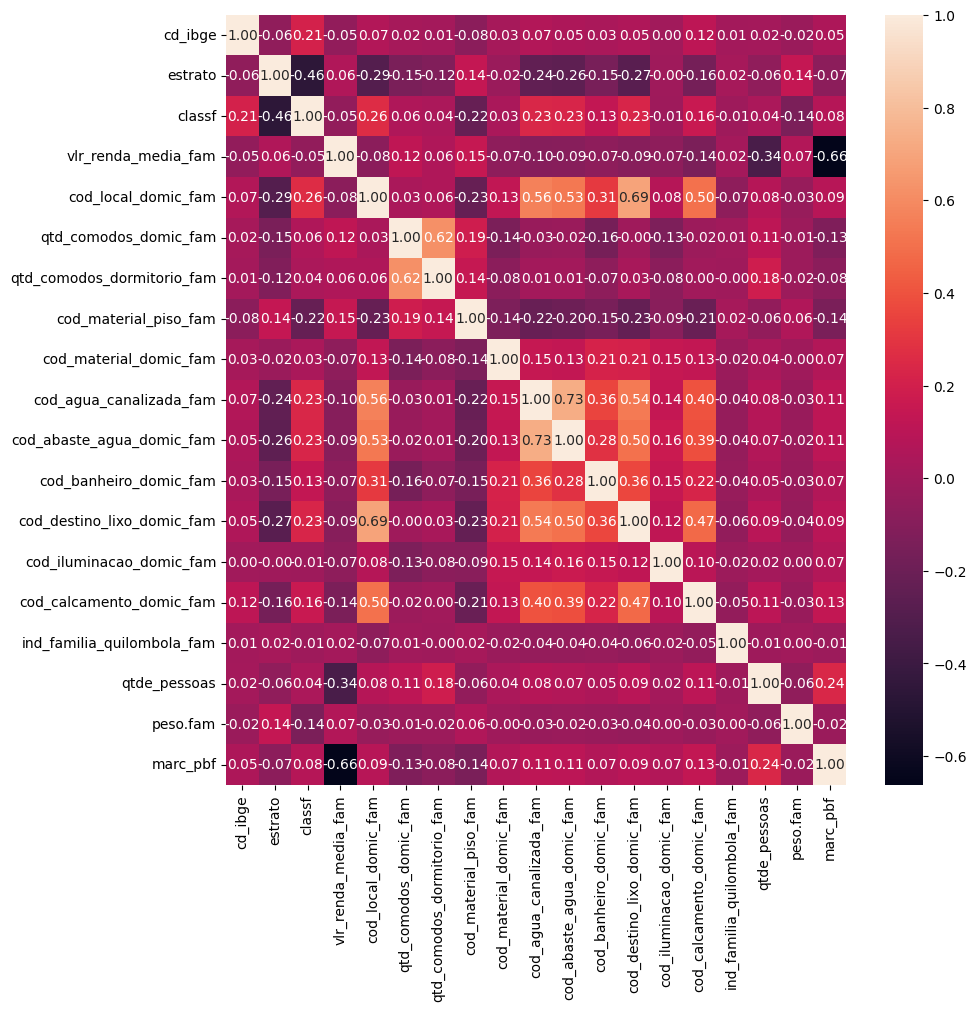

In [17]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

In [18]:
# removendo colunas de correlação próxima a 0 (em relação a marc_pbf)

correlation = data.corr()
correlation = correlation['marc_pbf'].abs()
correlation = correlation[correlation < 0.09]
correlation = correlation[correlation > -0.09]
columns_to_remove = correlation.index
columns_to_remove

Index(['cd_ibge', 'estrato', 'classf', 'qtd_comodos_dormitorio_fam',
       'cod_material_domic_fam', 'cod_banheiro_domic_fam',
       'cod_iluminacao_domic_fam', 'ind_familia_quilombola_fam', 'peso.fam'],
      dtype='object')

In [19]:
# atualizando o dataset apenas com as variaveis de mais forte correlação
_data = data.drop(columns=columns_to_remove)
_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367759 entries, 0 to 435655
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   vlr_renda_media_fam         367759 non-null  float64
 1   cod_local_domic_fam         367759 non-null  float64
 2   qtd_comodos_domic_fam       367759 non-null  float64
 3   cod_material_piso_fam       367759 non-null  float64
 4   cod_agua_canalizada_fam     367759 non-null  float64
 5   cod_abaste_agua_domic_fam   367759 non-null  float64
 6   cod_destino_lixo_domic_fam  367759 non-null  float64
 7   cod_calcamento_domic_fam    367759 non-null  float64
 8   qtde_pessoas                367759 non-null  int64  
 9   marc_pbf                    367759 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 30.9 MB


### Treinando o modelo RF

In [20]:
# analisando a distribuição da variável alvo (marc_pbf)
target_distribution = _data['marc_pbf'].value_counts(normalize=True) * 100

print(round(target_distribution))

marc_pbf
1    65.0
0    35.0
Name: proportion, dtype: float64


In [21]:
# separar X (features) e y (target)
X = data.drop('marc_pbf', axis=1)
y = data['marc_pbf']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# aplicando SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train_balanced.value_counts())

marc_pbf
1    166235
0    166235
Name: count, dtype: int64


In [22]:
# criar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [23]:
# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar métricas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Métrica ROC-AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     39018
           1       0.89      0.97      0.93     71310

    accuracy                           0.91    110328
   macro avg       0.92      0.88      0.89    110328
weighted avg       0.91      0.91      0.90    110328

Matriz de Confusão:
[[30494  8524]
 [ 1908 69402]]
AUC-ROC: 0.9260192630207478


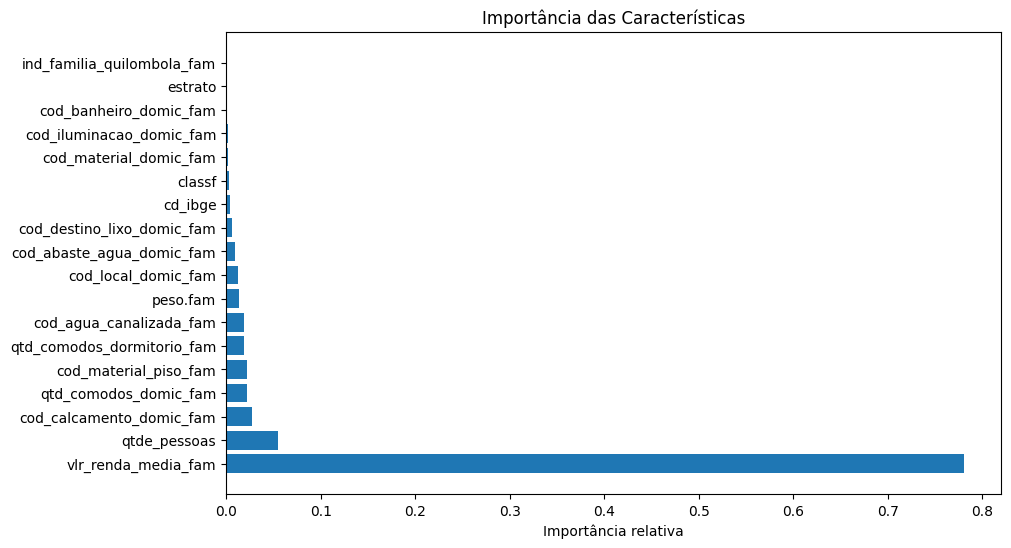

In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Obtendo a importância das características
importances = rf_model.feature_importances_

# Ordenando as características de acordo com a importância
indices = np.argsort(importances)[::-1]

# Visualizando a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[indices])  # Se tiver os nomes das características
plt.xlabel("Importância relativa")
plt.show()

### Selecionando features com SelectKBests

In [27]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]
print("Características selecionadas:", selected_columns)

Características selecionadas: Index(['vlr_renda_media_fam', 'cod_material_piso_fam',
       'cod_agua_canalizada_fam', 'cod_calcamento_domic_fam', 'qtde_pessoas'],
      dtype='object')


In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train_balanced)

RandomForestClassifier(random_state=42)

In [29]:
# Fazer previsões
y_pred = model.predict(X_test_selected)

# Avaliar métricas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Métrica ROC-AUC
y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     39018
           1       0.89      0.96      0.93     71310

    accuracy                           0.90    110328
   macro avg       0.91      0.88      0.89    110328
weighted avg       0.90      0.90      0.90    110328

Matriz de Confusão:
[[30833  8185]
 [ 2757 68553]]
AUC-ROC: 0.9176522634677979
